In [3]:
import warnings
warnings.filterwarnings('ignore')
# for data analysys and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install wandb
import wandb
# used for ml modeling and training and learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, recall_score, roc_curve, confusion_matrix, classification_report


In [5]:
landslide_data = pd.read_csv('bhutan_landslide_data.csv')
landslide_data.head()

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0


In [6]:
landslide_data['Altitude'].unique()
landslide_data['Type'].count()
landslide_data['Type'].value_counts()

slide       952
nonslide    269
Name: Type, dtype: int64

In [7]:
#checking null valuesg
missing_data = landslide_data.isnull()
missing_data.mean()

FID                   0.0
Type                  0.0
Code                  0.0
Lithology             0.0
Altitude              0.0
Slope                 0.0
Total curvature       0.0
Aspect                0.0
Distance to road      0.0
Distance to stream    0.0
Slope length          0.0
TWI                   0.0
STI                   0.0
dtype: float64

In [8]:
# num_values = []
# cat_valuse = []
# for column in landslide_data:
#   plt.figure(column, figsize=(6,6))
#   plt.title(column)
#   if is_numeric_dtype(landslide_data[column]):
#     num_values.append(column)
#     landslide_data[column].plot(kind='hist')
    
#   if is_string_dtype(landslide_data[column]):
#     cat_valuse.append(column)
#     landslide_data[column].value_counts().plot(kind='hist')

#   plt.show()

# landslide_data.groupby(['Code', 'Lithology']).count()
# pd.crosstab(landslide_data['Lithology'], landslide_data['Code']).plot(kind='bar')

In [9]:
# pd.crosstab(landslide_data['Slope'], landslide_data['Code']).plot(kind='bar')

In [10]:
# sns.pairplot(landslide_data)

In [11]:
# correlation = landslide_data.corr()
# sns.heatmap(correlation, annot=True, cmap='Dark2')

In [12]:
# handle unecessary data
landslide_data.drop(['FID'], axis = 1, inplace = True)
# landslide_data.drop(['STI'], axis = 1, inplace = True)
landslide_data.drop(['Type'], axis = 1, inplace = True)
# landslide_data.drop(['Total curvature'], axis = 1, inplace = True)
# landslide_data.drop(['Slope length'], axis = 1, inplace = True)


In [13]:
# Plot Landslide with Altitude
landslide_data.head()
# sns.countplot(x='Type' , hue='Altitude', data = landslide_data)

,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,1,1,1,2,1,7,1,5,2,4,1
1,1,1,1,3,1,4,2,2,2,5,1
2,1,1,1,2,3,7,1,1,1,3,0
3,1,1,1,3,1,10,1,2,2,4,0
4,1,1,1,3,1,10,1,4,3,5,0


In [23]:
#split data into x and y data
x_data = landslide_data.drop('Code',axis=1)
y_data = landslide_data['Code']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.25, stratify = y_data, random_state=42)

In [32]:
model_r = RandomForestClassifier(n_estimators=200, max_features=3, min_samples_split=2,min_samples_leaf=1, max_depth=30, bootstrap=True)
wandb.login()
# wandb.relogin()
run = wandb.init(project='landslideone', entity='sonamtaa', name='Random Forest')

#Train the model using the training sets
model_r.fit(X_train, y_train)

#Predict the response for test dataset
predictions = model_r.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
wandb.log({"Accuracy": accuracy , "Precision":  precision, "Recall": recall})
# print('Accuracy: ', accuracy)

#confusion metrix
confusion_metrix = confusion_matrix(y_test,predictions)
print('Confusion_metrix')
print(confusion_metrix)

classification = classification_report(y_test, predictions)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/sonam/.netrc
wandb: Currently logged in as: sonamtaa. Use `wandb login --relogin` to force relogin


Confusion_metrix
[[ 59   8]
 [ 17 222]]


In [33]:
import pickle
with open('model_rfc.pkl','wb') as file:
    pickle.dump(model_r,file)


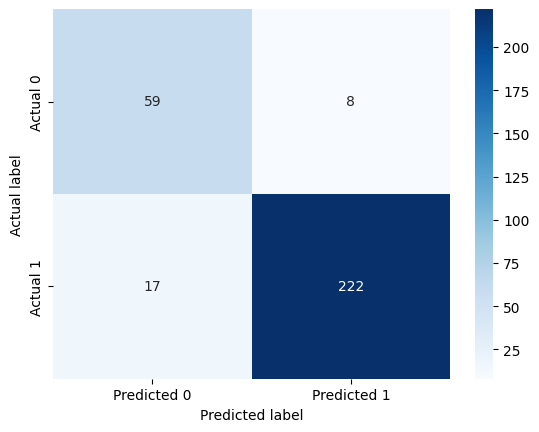

In [34]:
sns.heatmap(confusion_metrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

Area Under curve:  0.9047336539062012 



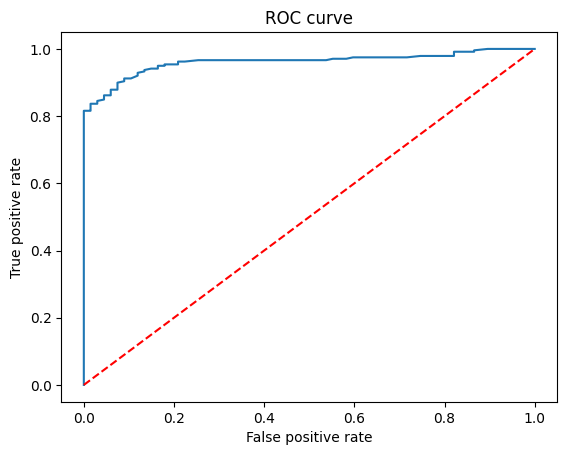

In [35]:
model_roc_auc_rf= roc_auc_score(y_test,predictions)
print('Area Under curve: ', model_roc_auc_rf, '\n')

probabilities_rf = model_r.predict_proba(X_test)
fpr_rf,tpr_rf,thresholds_rf= roc_curve(y_test,probabilities_rf[:,1])

plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

In [36]:
# accuracy_best = accuracy_score(y_test,predictions)

# print('Improvement of {:0.2f}%.'.format( 100 * (accuracy_best - accuracy_rf) / accuracy_rf))
# landslide_data.head()


Accuracy,▁
Precision,▁
Recall,▁
Accuracy,0.9183
Precision,0.96522
Recall,0.92887


Accuracy:  0.7516339869281046
Confusion_metrix
[[ 28  39]
 [ 37 202]]


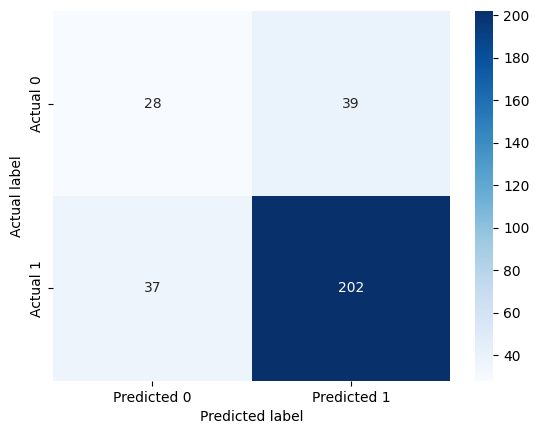

Area Under curve:  0.6315493661400112 



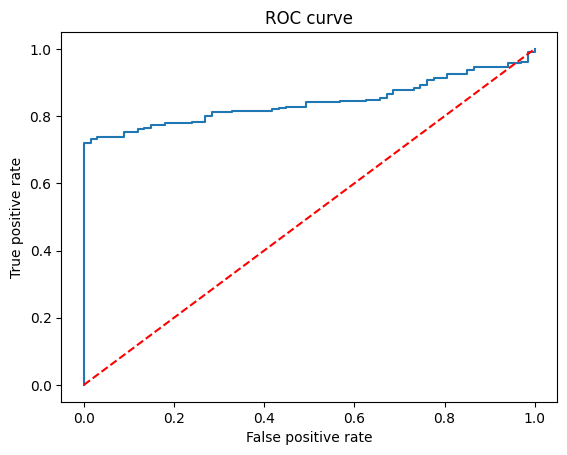

In [37]:
## using LogisticRegression model
from sklearn.linear_model import LogisticRegression

model_l = LogisticRegression()
wandb.init(project='landslideone', entity='sonamtaa', name='Logistic Regression')

#Train the model using the training sets
model_l.fit(X_train, y_train)

#Predict the response for test dataset
predictions = model_l.predict(X_test)

accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
wandb.log({"Accuracy": accuracy , "Precision":  precision, "Recall": recall})
print('Accuracy: ', accuracy)

#confusion metrix
confusion_metrix = confusion_matrix(y_test,predictions)
print('Confusion_metrix')
print(confusion_metrix)

#classification_report 
classification = classification_report(y_test, predictions)

sns.heatmap(confusion_metrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

model_roc_auc= roc_auc_score(y_test,predictions)
print('Area Under curve: ', model_roc_auc, '\n')

probabilities = model_l.predict_proba(X_test)
fpr,tpr,thresholds= roc_curve(y_test,probabilities[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()

In [38]:
# landslide_data['Total curvature'].plot(kind='hist')
# landslide_data['Slope length'].plot(kind='hist')

In [39]:
# landslide_data['Total curvature'].value_counts()
import pickle
with open('model_l.pkl','wb') as file:
    pickle.dump(model_l,file)


In [40]:
# landslide_data['Slope'].value_counts()

In [41]:
# sns.boxplot(x='Code', y='Slope', data=landslide_data)

In [42]:
# X = x_data
# Y = landslide_data['Code']

# X_traind, X_testd, y_traind, y_testd = train_test_split(X, Y, random_state=42, train_size = .75, stratify = Y)

reg = DecisionTreeClassifier()

In [43]:
# train the model with dt
reg.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy,▁
Precision,▁
Recall,▁
Accuracy,0.75163
Precision,0.83817
Recall,0.84519


Accuracy:  0.8594771241830066
Confusion_metrix
[[ 46  21]
 [ 22 217]]


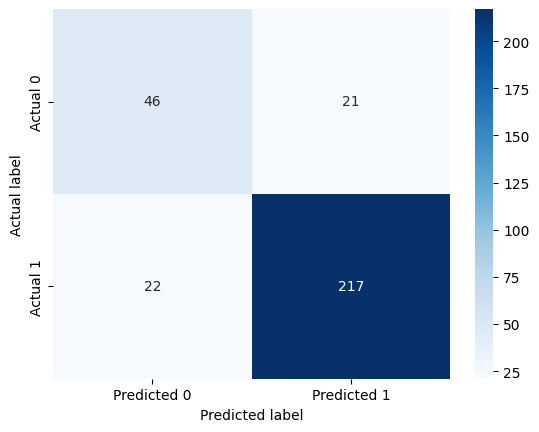

Area Under curve:  0.7972584774870417 



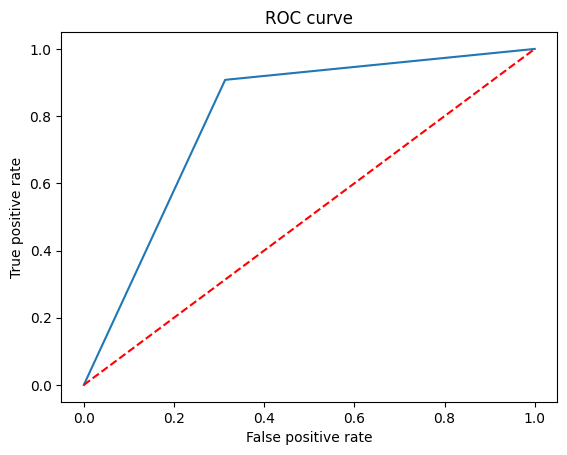

In [44]:
# score = reg.score(X_test, y_test)
# print(score)
#Predict the response for test dataset
wandb.init(project='landslideone', entity='sonamtaa', name='Decision Tree')

predictions = reg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
wandb.log({"Accuracy": accuracy , "Precision":  precision, "Recall": recall})

print('Accuracy: ', accuracy)

confusion_metrix = confusion_matrix(y_test,predictions)
print('Confusion_metrix')
print(confusion_metrix)

#classification_report 
classification = classification_report(y_test, predictions)

# heat map
sns.heatmap(confusion_metrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

model_roc_auc = roc_auc_score(y_test,predictions)
print('Area Under curve: ', model_roc_auc, '\n')

probabilities = reg.predict_proba(X_test)
fpr,tpr,thresholds= roc_curve(y_test,probabilities[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

plt.show()


In [45]:
import pickle
with open('model_dt.pkl','wb') as file:
    pickle.dump(reg,file)